# Second Order System 
## Step Response

This demo models the response of  a second order system exposed to a step force (Heaviside function). 
The system starts at rest with the initial value $s_0=0$ for $t=0$, and goes towards a the final value $s_\infty=1$ when $t \rightarrow \infty$. 
The system is fully described by two parameters, the resonance frequency $f_0$ and the demping ratio $\zeta$.

Other parameters can be calculated from these, such as

The frequency of damped oscillations $\quad f_d = f_0 \sqrt{1-\zeta^2}$

Characteristic time, inverse eigenfrequency $\quad T_0 = \frac{1}{f_0}$

The period of damped oscillations $\quad T_d = \frac{1}{f_d} =  \frac{T_0}{\sqrt{1-\zeta^2}}$

The system is *underdamped* if the damping ratio $\zeta < 1$ and *overdamped* if $\zeta > 1$. The situation where $\zeta = 1$ is called *critically damped*.

The step response for an underdamped system, $\zeta < 1$ is
\begin{align*}
    s(t) &=  1 - \frac{1}{\sqrt{1-\zeta^2}} e^{- 2 \pi f_0 \zeta t} \cos(2 \pi f_d t + \phi) \quad ,  &
    \tan \phi &= \frac{-1}{\sqrt{1-\zeta^2}} 
\end{align*}

The step response for an overdamped system, $\zeta > 1$ is

\begin{align*}
    s(t) &=  1 - \frac{\zeta + \sqrt{\zeta^2-1}}{2\sqrt{\zeta^2-1}} e^{-2\pi  (\zeta - \sqrt{\zeta^2 - 1} ) f_0 t} 
           + \frac{\zeta - \sqrt{\zeta^2-1}}{2\sqrt{\zeta^2-1}} e^{-2\pi (\zeta + \sqrt{\zeta^2 - 1} ) f_0 t}  
\end{align*}
$\zeta =1$ can be handled as a limiting case for either of these.


In [14]:
import numpy as np
from math import pi, sqrt
import matplotlib.pyplot as plt

# Allow interactive figures in Matplotlig
%matplotlib ipympl

class StepResponse:
    """Demonstation of second order system step response.

    All calculations and plotting routines are contained in this class
    """

    def __init__(self, f0=1, zeta=0.7):
        """Initialise system parameters."""
        self.f0 = f0         # Resonance frequency
        self.zeta = zeta     # Damping ratio
        self.t_min = -0.2    # Minimum time on plot
        self.t_max = 4       # Maximum time on plot
        self.n_t = 300       # Number of points in time vectors
        self.ax = self.initialise_graphs()

    def initialise_graphs(self):
        """Initialise result graph ."""
        plt.close("all")
        plt.rc('font', size=10)          # Default text sizes
        fig = plt.figure(figsize=[10, 5],
                         constrained_layout=True,
                         num="Second Order System - Step Response")
        ax = fig.add_subplot(1, 1, 1)

        ax.set(xlim=(self.t_min, self.t_max),
               ylim=(0, 2),
               xlabel="Time $t$ [s]",
               ylabel="Response $s(t)")

        ax.grid(True)

        return ax

    def undercritical(self):
        """Determine whether damping is under- or overcritical."""
        if self.zeta == 1:
            self.zeta += 0.001  # Make overcritical by adding tiny amount
        
        return self.zeta < 1

    def fd(self):
        """Calculate frequency of free oscillations."""
        if self.undercritical():
            fd = self.f0 * sqrt(1-self.zeta**2)
        else:
            fd = 0
        return fd

    def T0(self):
        """Calculate resonance period."""
        return 1/self.f0

    def Td(self):
        """Calculate period of free oscillations."""
        if self.undercritical():
            Td = 1/self.fd()
        else:
            Td = 0
        return Td

    def t(self):
        """Create time vector."""
        return np.linspace(self.t_min, self.t_max, self.n_t)

    def _calc_response(self, t):
        """Calculate step response."""
        w0 = 2*pi*self.f0

        if self.undercritical():   
            zt = sqrt(1-self.zeta**2)
            wd = w0*zt        # Frequency of damped oscillations
            phi = np.arctan2(-self.zeta, zt)
            s = 1 - np.exp(-self.zeta*w0*t) * 1/zt * np.cos(wd*t + phi)
        else:
            z = sqrt(self.zeta**2-1)
            s = 1 - (self.zeta+z)/(2*z) * np.exp((-self.zeta+z)*w0*t) \
                  + (self.zeta-z)/(2*z) * np.exp((-self.zeta-z)*w0*t)
            
        k_neg = np.argwhere(self.t() < 0)
        s[k_neg] = np.zeros_like(k_neg)   # Set initial value for t<0

        return s

    def s(self):
        """Find step response for all time-points."""
        s = self._calc_response(self.t())
        return s

    def plot(self):
        """Plot result in graph."""
        # Remove existing graphs and texts
        for art in list(self.ax.lines):
            art.remove()
        for art in list(self.ax.texts):
            art.remove()

        # Plot graph
        self.ax.plot(self.t(), self.s(), linestyle="-", color="C0")
        self.ax.axhline(y=1, linestyle='-', color="black")

        # Mark resonance period
        self.ax.axvline(x=self.T0(), linestyle='--', color="C2")
        self.ax.text( self.T0(), 0.3, f" $T_0$ = {self.T0():0.2f} s", color="C2")

        # Mark period of free oscillations and whether underdamped
        if self.undercritical():
            self.ax.axvline(x=self.Td(), linestyle='--', color="C3")
            self.ax.text( self.Td(), 0.1, f" $T_d$ = {self.Td():0.2f} s", color="C3")
            status = " Undercritical "
            status_colors  = ["white", "C0"]
        else:
            status = " Overcritical " 
            status_colors  = ["black", "C1"]

        self.ax.text(2.7, 1.75, status, color=status_colors[0], backgroundcolor=status_colors[1])

        return 0



Label(value='Second Order System Step Response', style=LabelStyle(font_weight='bold'))

FloatSlider(value=1.0, description='Resonance Frequency [Hz]', layout=Layout(width='60%'), max=4.0, min=0.1, r…

FloatLogSlider(value=0.6, description='Damping Ratio', layout=Layout(width='60%'), max=1.0, min=-2.0, readout_…

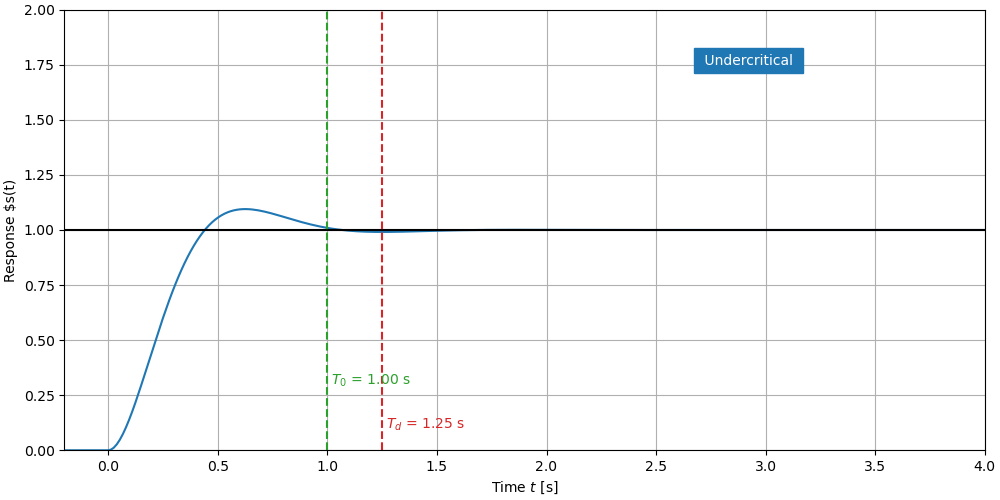

In [16]:
# Load modules for intereactive operation
import ipywidgets as widgets

#  Function that runs the demo interactively
def run_stepresponse(f0, zeta):
    """Set values and call plotting function."""
    step_resp.f0 = f0
    step_resp.zeta = zeta 
    step_resp.plot()
    return    

# Define widgets to operate program
widget_style = dict(description_width='initial')

title_widget = widgets.Label("Second Order System Step Response", 
                             style=dict(font_weight='bold'))

f0_widget = widgets.FloatSlider(min=0.1, max= 4, value=1, step=0.1, 
                                 description='Resonance Frequency [Hz]',  
                                 readout_format='.1f',
                                 layout=widgets.Layout(width='60%'),
                                 style=widget_style)
zeta_widget = widgets.FloatLogSlider(min=-2, max= 1, value=0.60, step=0.02, 
                                 description='Damping Ratio',  
                                 readout_format='.2f',
                                 layout=widgets.Layout(width='60%'),
                                 style=widget_style)

display(title_widget)
display(f0_widget)
display(zeta_widget)

# Define signal and run demo
step_resp = StepResponse()
Sw = widgets.interactive(run_stepresponse, f0=f0_widget, zeta=zeta_widget)